Let's build a decision tree on the mtcars data frame to predict whether a given car in the data frame represents an automatic (0) or manual transmission (1). Before we do that we might look at various relationships that might be observable which would allow us to make our own decsion tree without doing much in the way of math. 

In [282]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

y = mtcars.am
X = mtcars.drop('am',axis=1)

mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Text(0, 0.5, 'carb')

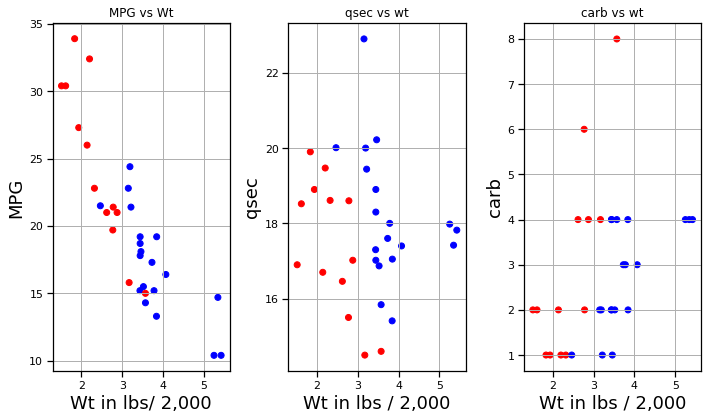

In [283]:
colors = {0:'blue', 1:'red'}
plt.figure(figsize=(10,6),tight_layout=True)
plt.subplot(1,3,1)
plt.scatter(mtcars['wt'], mtcars['mpg'], c=mtcars['am'].map(colors))
plt.grid()
plt.title("MPG vs Wt")
plt.ylabel("MPG")
plt.xlabel("Wt in lbs/ 2,000")

plt.subplot(1,3,2)
plt.scatter(mtcars['wt'], mtcars['qsec'], c=mtcars['am'].map(colors))
plt.grid()
plt.title("qsec vs wt")
plt.xlabel("Wt in lbs / 2,000")
plt.ylabel("qsec")

plt.subplot(1,3,3)
plt.scatter(mtcars['wt'], mtcars['carb'], c=mtcars['am'].map(colors))
plt.grid()
plt.title("carb vs wt")
plt.xlabel("Wt in lbs / 2,000")
plt.ylabel("carb")

The benfit of this approach is that we can see what variables might be more important in making an ultimate decision on whether a car is automatic or manual. This data is pretty simple and if you know anything about cars then you might be able to intuit this yourself. We could look at a pairs plot to generalize the visualization

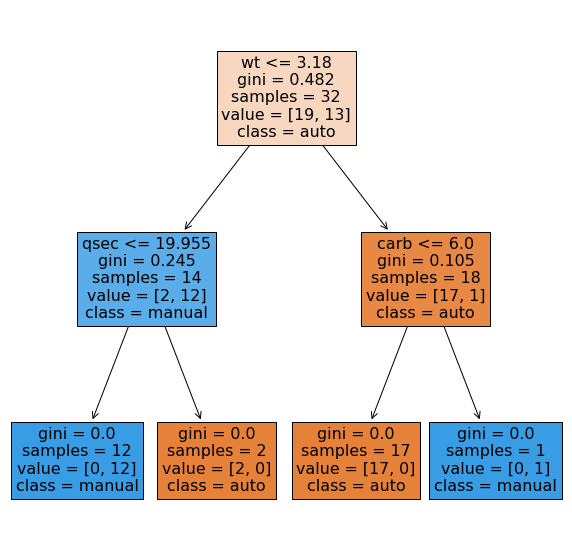

In [284]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

y = mtcars.am
X = mtcars.drop('am',axis=1)

classnames = mtcars.am.map({1:'m',0:'a'})
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,y)

plt.figure(figsize=(10,10))

myt = tree.plot_tree(clf,feature_names=X.columns,class_names=['auto','manual'],filled=True)

In reference to the above tree let's trace through it to see how it works. The first split looks a the **wt** variable although what we don't see is that under the covers, the method will look at all features in an attempt to identify the one that will maximize "purity" (or minimize impurity). In this case, it turns out that **wt** seems to be important in whether a car has an automatic vs manual tranmission. We start out with 32 samples and then filter the data on cars that are less than or equal to 3.18. Note that weight is in lbs/2,000. 

In [285]:
# We get 14 rows which matches the left side of the tree
print(mtcars[mtcars['wt'] <= 3.18].shape[0])

# 2 of those are automatic and 12 are manual
print(mtcars[mtcars['wt'] <= 3.18].am.value_counts())

14
1    12
0     2
Name: am, dtype: int64


In [286]:
# Then we look at qsec to see if it less than or equal to 19.95
next_leaf = mtcars[mtcars['wt'] <= 3.18]
print(next_leaf[next_leaf['qsec'] <= 19.95].am.value_counts())

1    12
Name: am, dtype: int64


So we could do the same thing for the right side of the tree but that's left as an exercise for you to do. Notice that as move down the tree the Gini value decreases with an eventual value of 0.00 which means that the resulting node / leaf is "pure".

It's important to point out that the method has arguments that we can use to influence how things turn out. We could, for example, restrict the tree to a "stumpt" by saying we only want a tree of depth 1.

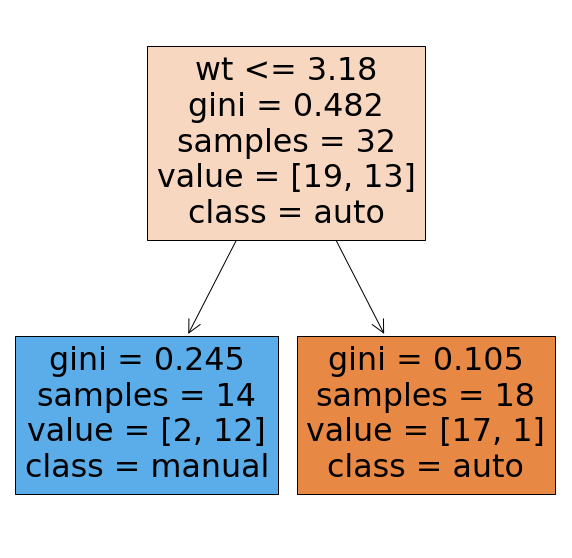

In [290]:
clf = DecisionTreeClassifier(random_state=0,max_depth=1)
clf.fit(X,y)

plt.figure(figsize=(10,10))

myt = tree.plot_tree(clf,feature_names=X.columns,class_names=['auto','manual'],filled=True)

We could also look at the "max_features". Look what happens when we tell the method how many features to consider when figuring out how to create new leafs. A popular choice is "sqrt" which takes the square root of the total number of predictor features. 

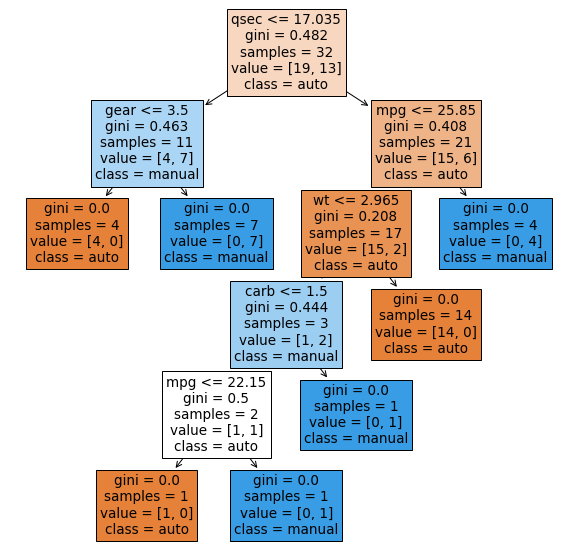

In [280]:
clf = DecisionTreeClassifier(random_state=0,max_features='sqrt')
clf.fit(X,y)

plt.figure(figsize=(10,10))

myt = tree.plot_tree(clf,feature_names=X.columns,class_names=['auto','manual'],filled=True)

The resulting tree is harder to read and has leaves with just 1,2, or 3 samples which might suggest that we are getting to specific in how the tree is getting made. That is, the bias might be lower but the variance of the resulting tree might not generalize well to unseen data. On the other hand it does what we asked it to do. We could continue to play this game. We can require a leaf to have a minimum number of samples in it. This forces the model to be less specific to the data possibly resulting in higher bias but that's not necessarily a bad thing. 

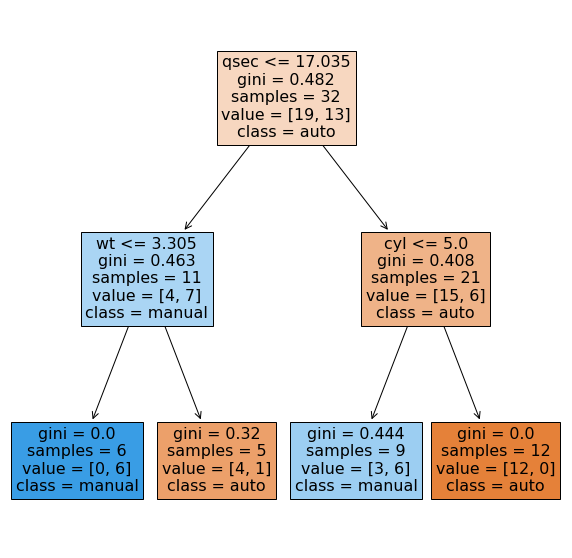

In [281]:
clf = DecisionTreeClassifier(random_state=0,max_features='sqrt',min_samples_leaf=5)
clf.fit(X,y)

plt.figure(figsize=(10,10))

myt = tree.plot_tree(clf,feature_names=X.columns,class_names=['auto','manual'],filled=True)

What we also notice is that the trees we generate can be very different from the one before so we have concerns about how well we could trust the model on new data. However, one major advantage of a single Decision Tree is that it's really easy to see how it arrives at an ultimate decision. So this approach has a high degree of transparency that "Bagged" and "Boosted" trees do not have even though they might offer better performance. Here is an example of using a Decision Tree to do regression. Here we predict the mpg for each car.

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

clf = tree.DecisionTreeRegressor()
y = mtcars.mpg
X = mtcars.drop('mpg',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
clf.fit(X_train,y_train)
y_reg_preds = clf.predict(X_test)
print("RMSE is: ",round(mean_squared_error(y_test,y_reg_preds)**0.5,2))

RMSE is:  2.25
